<a href="https://colab.research.google.com/github/via-zhang/geo-workshops/blob/main/1_intro_geospatial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome! This is a Google Colab file, which allows you to run code all in one place. To make a copy of this document:

> In the top left corner, click on `Open in Colab`.
>
> Once you open this in Colab, click on `File` in the upper-left corner, then click on `Save`. You will be prompted to save a copy in your personal Google Drive.

To run the code:
> Each block of code is called a cell. To run a cell, hover over it and click the arrow in the top left of the cell, or click inside of the cell and press `Ctrl + Enter`.

# Intro to Python (Optional)
Review the information below to gain a background understanding of the basics of the Python programming knowledge. This is optional, and you may skip to "Intro to Geospatial Analysis in Python" if you feel ready to begin the activity.

In [ ]:
# This is a comment. Comments do not impact your code and are meant to serve as notes to explain what the code is doing
# This is especially helpful when sharing code with others

In [ ]:
# In Python, the equals sign (=) is used to assign something to a variable

# Create a variable named anything you want (in this case, named intro) and assign text ("Hello world!") to it
intro = "Hello world!"

# Print out the value stored in the variable below this cell
print(intro)

Hello world!


In [ ]:
# There are different types of data you can work with in Python
# You can use type() to check the type of a variable

# Strings (AKA text)
ex_string = "This is a string"
print(type(ex_string))

# Integers (AKA whole numbers)
ex_int = 1234
print(type(ex_int))

# Floats (AKA decimals)
ex_float = 1.234
print(type(ex_float))

# Booleans (AKA true and false)
ex_boolean = True
print(type(ex_boolean))

# Lists (a list of any of the same data type)
ex_list = [1, 2, 3, 4]
print(type(ex_list))

<class 'str'>
<class 'int'>
<class 'float'>
<class 'bool'>
<class 'list'>


In [ ]:
# You can create functions with Python to complete a series of actions based on input variable(s)

def name_of_function(input):
  # Do something with the input
  return output

# Example of a function to multiply the input by 2
def multiply_by_2(input):
  output = input * 2
  print(input, "becomes", output)
  return output

output = multiply_by_2(10)
print("Output:", output)

10 becomes 20
Output: 20


Learn more about Python with these free resources
- [The Python Tutorial](https://docs.python.org/3/tutorial/index.html)
- [Harvard's CS50's Introduction to Programming with Python](https://cs50.harvard.edu/python/2022/)
- [Google's Python Class](https://developers.google.com/edu/python)


# Intro to Geospatial Analysis in Python

## Activity: Climate and Economic Justice
> Data: https://screeningtool.geoplatform.gov/en/
>
> More Info: https://screeningtool.geoplatform.gov/en/methodology

### Setup

In [29]:
# Install packages used to create maps
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [30]:
# Enter the full name of the state you want to analyze inside of the quotation marks. Make sure it is capitalized
# Example (write this but without the # sybmol at the front):
# state_name = "New York"

state_name = ""

Run the rest of the code in this section (no need to edit anything yet). If you get an error saying `NameError: name 'pd' is not defined`, run the code above that starts with `# Install packages used to create maps`

In [31]:
# Load data directly from URL (this temporarily loads a copy of the data to this Google Colab notebook and will be deleted after closing the tab)
# This might take a few seconds to a minute to run

ej_data = pd.read_csv("https://static-data-screeningtool.geoplatform.gov/data-versions/1.0/data/score/downloadable/1.0-communities.csv", low_memory=False)

ej_data.sort_values(by=["Census tract 2010 ID"])

,Census tract 2010 ID,County Name,State/Territory,Percent Black or African American alone,Percent American Indian / Alaska Native,Percent Asian,Percent Native Hawaiian or Pacific,Percent two or more races,Percent White,Percent Hispanic or Latino,...,Percent individuals age 25 or over with less than high school degree,Percent of residents who are not currently enrolled in higher ed,Unemployment (percent) in 2009 (island areas) and 2010 (states and PR),Percentage households below 100% of federal poverty line in 2009 (island areas) and 2010 (states and PR),Greater than or equal to the 90th percentile for unemployment and has low HS education in 2009 (island areas)?,Greater than or equal to the 90th percentile for households at or below 100% federal poverty level and has low HS education in 2009 (island areas)?,Greater than or equal to the 90th percentile for low median household income as a percent of area median income and has low HS education in 2009 (island areas)?,Number of Tribal areas within Census tract for Alaska,Names of Tribal areas within Census tract,Percent of the Census tract that is within Tribal areas
0,1001020100,Autauga County,Alabama,0.07,0.0,0.00,0.00,0.07,0.83,0.01,...,12.0,91.0,2.0,10.0,False,False,False,NaN,NaN,NaN
1,1001020200,Autauga County,Alabama,0.57,0.0,0.00,0.01,0.02,0.38,0.01,...,14.0,96.0,5.0,14.0,False,False,False,NaN,NaN,NaN
2,1001020300,Autauga County,Alabama,0.24,0.0,0.00,0.00,0.02,0.65,0.06,...,14.0,97.0,5.0,8.0,False,False,False,NaN,NaN,NaN
3,1001020400,Autauga County,Alabama,0.05,0.0,0.00,0.00,0.03,0.89,0.01,...,8.0,94.0,3.0,6.0,False,False,False,NaN,NaN,NaN
4,1001020500,Autauga County,Alabama,0.18,0.0,0.03,0.00,0.02,0.70,0.04,...,7.0,94.0,2.0,5.0,False,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74129,78030960900,NaN,Virgin Islands,0.76,0.0,0.03,NaN,0.01,0.14,0.10,...,NaN,NaN,10.0,21.0,False,False,False,NaN,NaN,NaN
74130,78030961000,NaN,Virgin Islands,0.85,0.0,0.01,NaN,0.01,0.07,0.20,...,NaN,NaN,10.0,27.0,False,False,False,NaN,NaN,NaN
74131,78030961100,NaN,Virgin Islands,0.89,0.0,0.02,NaN,0.00,0.05,0.11,...,NaN,NaN,7.0,28.0,False,False,False,NaN,NaN,NaN
74132,78030961200,NaN,Virgin Islands,0.90,0.0,0.00,NaN,0.01,0.04,0.14,...,NaN,NaN,11.0,29.0,False,False,True,NaN,NaN,NaN


In [ ]:
# This is a dictionary (AKA a list of corresponding values) in Python
# We'll use this to get the FIPS code for the state we want to analyze

FIPS_dictionary = {
    "Alabama": "01",
    "Alaska": "02",
    "Arizona": "04",
    "Arkansas": "05",
    "California": "06",
    "Colorado": "08",
    "Connecticut": "09",
    "Delaware": "10",
    "District Of Columbia": "11",
    "Florida": "12",
    "Georgia": "13",
    "Hawaii": "15",
    "Idaho": "16",
    "Illinois": "17",
    "Indiana": "18",
    "Iowa": "19",
    "Kansas": "20",
    "Kentucky": "21",
    "Louisiana": "22",
    "Maine": "23",
    "Maryland": "24",
    "Massachusetts": "25",
    "Michigan": "26",
    "Minnesota": "27",
    "Mississippi": "28",
    "Missouri": "29",
    "Montana": "30",
    "Nebraska": "31",
    "Nevada": "32",
    "New Hampshire": "33",
    "New Jersey": "34",
    "New Mexico": "35",
    "New York": "36",
    "North Carolina": "37",
    "North Dakota": "38",
    "Ohio": "39",
    "Oklahoma": "40",
    "Oregon": "41",
    "Pennsylvania": "42",
    "Rhode Island": "44",
    "South Carolina": "45",
    "South Dakota": "46",
    "Tennessee": "47",
    "Texas": "48",
    "Utah": "49",
    "Vermont": "50",
    "Virginia": "51",
    "Washington": "53",
    "West Virginia": "54",
    "Wisconsin": "55",
    "Wyoming": "56"
}

# This will output the corresponding FIPS code of the state, which we'll use below to download the state boudary
state_id = FIPS_dictionary[state_name.title()]

If you get an error at this point, please double check that the name of the state in the code block above is spelled correctly and begins with a capital letter.

In [ ]:
# Download census tract boundaries for state from https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/
# This might take a few seconds to a minute to run

census_tract_boundaries = gpd.read_file(f"https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_{state_id}_tract10.zip")

census_tract_boundaries.sort_values(by=["TRACTCE10"])

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
1792,42,075,000100,42075000100,1,Census Tract 1,G5020,S,1599857,0,+40.3375658,-076.4185825,"POLYGON ((-76.41168 40.33306, -76.41186 40.333..."
783,42,049,000100,42049000100,1,Census Tract 1,G5020,S,732980,10113,+42.1262503,-080.0822810,"POLYGON ((-80.07637 42.12314, -80.07661 42.123..."
1632,42,081,000100,42081000100,1,Census Tract 1,G5020,S,2494788,3384,+41.2592498,-076.9951876,"POLYGON ((-76.99148 41.26180, -76.98804 41.261..."
2432,42,101,000100,42101000100,1,Census Tract 1,G5020,S,704909,0,+39.9523827,-075.1466628,"POLYGON ((-75.14147 39.95170, -75.14150 39.951..."
1505,42,107,000100,42107000100,1,Census Tract 1,G5020,S,177402125,590970,+40.8889797,-076.1590292,"POLYGON ((-76.17510 40.94118, -76.17321 40.940..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,42,041,981606,42041981606,9816.06,Census Tract 9816.06,G5020,S,1097111,80398,+40.1575779,-076.9816136,"POLYGON ((-76.98171 40.16322, -76.98162 40.163..."
443,42,003,981800,42003981800,9818,Census Tract 9818,G5020,S,1652680,310067,+40.4790228,-079.8942288,"POLYGON ((-79.89918 40.47606, -79.90030 40.475..."
77,42,003,982200,42003982200,9822,Census Tract 9822,G5020,S,505672,0,+40.4444879,-079.9547652,"POLYGON ((-79.95266 40.44181, -79.95288 40.441..."
2788,42,101,989100,42101989100,9891,Census Tract 9891,G5020,S,2664969,1649710,+40.0377830,-075.0034085,"POLYGON ((-74.99019 40.03634, -74.99098 40.035..."


In [ ]:
# Add leading zeros to 'Census tract 2010 ID' column so each has length of 11. This helps prepare the data for merging with the other dataset
ej_data['GEOID10'] = ej_data['Census tract 2010 ID'].apply('{:0>11}'.format)

# Merge the data with the census tract boundaries for the selected state
data = census_tract_boundaries.merge(ej_data, on='GEOID10')

In [ ]:
# View the data
data

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,...,Percent individuals age 25 or over with less than high school degree,Percent of residents who are not currently enrolled in higher ed,Unemployment (percent) in 2009 (island areas) and 2010 (states and PR),Percentage households below 100% of federal poverty line in 2009 (island areas) and 2010 (states and PR),Greater than or equal to the 90th percentile for unemployment and has low HS education in 2009 (island areas)?,Greater than or equal to the 90th percentile for households at or below 100% federal poverty level and has low HS education in 2009 (island areas)?,Greater than or equal to the 90th percentile for low median household income as a percent of area median income and has low HS education in 2009 (island areas)?,Number of Tribal areas within Census tract for Alaska,Names of Tribal areas within Census tract,Percent of the Census tract that is within Tribal areas
0,42,003,560500,42003560500,5605,Census Tract 5605,G5020,S,464657,0,...,3.0,88.0,2.0,10.0,False,False,False,NaN,NaN,NaN
1,42,003,560400,42003560400,5604,Census Tract 5604,G5020,S,511109,0,...,4.0,80.0,7.0,24.0,False,False,False,NaN,NaN,NaN
2,42,003,552400,42003552400,5524,Census Tract 5524,G5020,S,2044853,200574,...,11.0,93.0,5.0,30.0,False,False,False,NaN,NaN,NaN
3,42,003,552300,42003552300,5523,Census Tract 5523,G5020,S,830982,0,...,16.0,89.0,9.0,31.0,False,False,False,NaN,NaN,NaN
4,42,003,552200,42003552200,5522,Census Tract 5522,G5020,S,804538,243347,...,11.0,94.0,14.0,24.0,False,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,42,109,070200,42109070200,702,Census Tract 702,G5020,S,120426746,1747046,...,12.0,95.0,2.0,11.0,False,False,False,NaN,NaN,NaN
3214,42,109,070300,42109070300,703,Census Tract 703,G5020,S,128826883,960075,...,10.0,96.0,4.0,13.0,False,False,False,NaN,NaN,NaN
3215,42,109,070600,42109070600,706,Census Tract 706,G5020,S,135524410,858814,...,25.0,97.0,6.0,6.0,False,False,False,NaN,NaN,NaN
3216,42,109,070701,42109070701,707.01,Census Tract 707.01,G5020,S,3926593,179533,...,5.0,97.0,7.0,11.0,False,False,False,NaN,NaN,NaN


Notice how the lower-left corner of the table says `# rows x 146 columns`. What's printed above is only a small part of the dataset, and we have a lot more rows and columns to work with. To see the names of all the columns, run the code below:

In [ ]:
# Print names of columns in the dataset
list(ej_data.columns)

['Census tract 2010 ID',
 'County Name',
 'State/Territory',
 'Percent Black or African American alone',
 'Percent American Indian / Alaska Native',
 'Percent Asian',
 'Percent Native Hawaiian or Pacific',
 'Percent two or more races',
 'Percent White',
 'Percent Hispanic or Latino',
 'Percent other races',
 'Percent age under 10',
 'Percent age 10 to 64',
 'Percent age over 64',
 'Total threshold criteria exceeded',
 'Total categories exceeded',
 'Identified as disadvantaged without considering neighbors',
 'Identified as disadvantaged based on neighbors and relaxed low income threshold only',
 'Identified as disadvantaged due to tribal overlap',
 'Identified as disadvantaged',
 'Percentage of tract that is disadvantaged by area',
 'Share of neighbors that are identified as disadvantaged',
 'Total population',
 'Adjusted percent of individuals below 200% Federal Poverty Line (percentile)',
 'Adjusted percent of individuals below 200% Federal Poverty Line',
 'Is low income?',
 'Income 

### Checkpoint 1: We have all of our data loaded. What do you think about programming so far? Is there anything unexpected to you about Python?

Answer in the text block below:

### Part 1: Mapping

Using Python, we can map a specific column of the dataset. In the examples below, we will make a **choropleth map**, which shows different colors based on the data and region. First, we'll make a map of the percentile of PM2.5 (which are small particles that pollute the air). Percentiles tell us the percent of the U.S. population with an equal or lower value. For example, a community at the 90th percentile for PM2.5 would have levels greater than or equal to 90% of the rest of the population, indicating worse air quality (and more disadvantage & environmental burden).

Text(0.08, 0.08, 'Source: The Climate and Economic Justice Screening Tool \nby the White House Council on Environmental Quality')

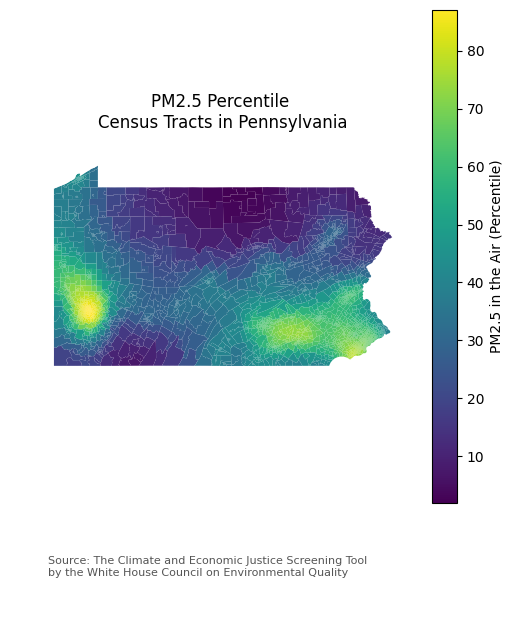

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 8))

data.plot(column='PM2.5 in the air (percentile)', # Name of the column
          legend=True,
          ax=ax,
          legend_kwds = {
              'label': 'PM2.5 in the Air (Percentile)',
              'shrink': 0.8
          },
          missing_kwds={
                'color': 'white',
                'label': 'Missing Data'
            }
)

ax.axis('off') # Don't show grid lines
ax.set_title(f'PM2.5 Percentile \nCensus Tracts in {state_name}')

# Create a text box in the lower-left corner to cite the data source
ax.annotate('Source: The Climate and Economic Justice Screening Tool \nby the White House Council on Environmental Quality',
            xy=(0.08, .08),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=8,
            color='#555555')

In [ ]:
# Let's define a function to make these maps

def makeMap(data, variable):
  fig, ax = plt.subplots(1, figsize=(6, 8))

  data.plot(column=variable, # Name of the column
            legend=True,
            ax=ax,
            legend_kwds = {
                'label': variable,
                'shrink': 0.8
            },
            missing_kwds={
                'color': 'white',
                'label': 'Missing Data'
            }
  )

  ax.axis('off')
  ax.set_title(f"{variable.title()}\nCensus Tracts in {state_name}")

  ax.annotate("Source: The Climate and Economic Justice Screening Tool \nby the White House Council on Environmental Quality",
              xy=(0.08, .08),
              xycoords='figure fraction',
              horizontalalignment='left',
              verticalalignment='top',
              fontsize=8,
              color='#555555')

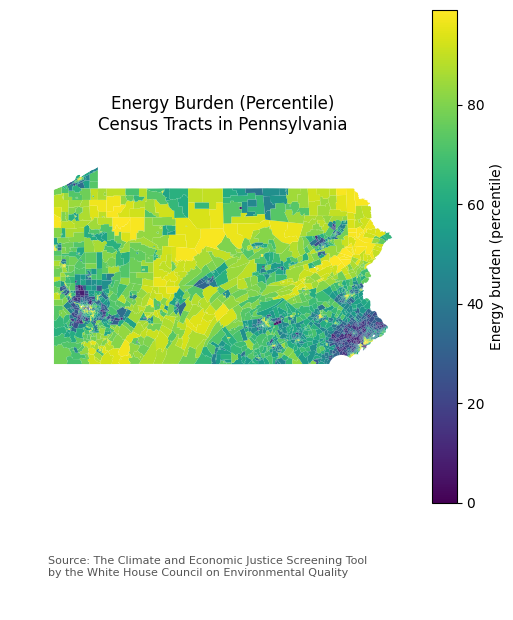

In [ ]:
# Let's test the function
makeMap(data, "Energy burden (percentile)")

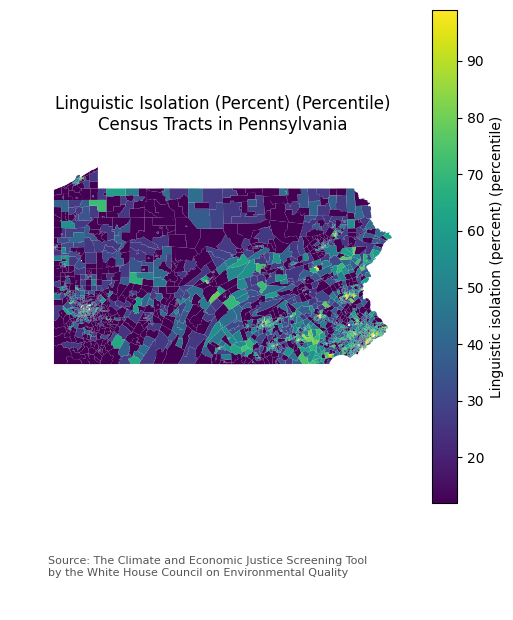

In [ ]:
makeMap(data, "Linguistic isolation (percent) (percentile)")

Notice how we can make a map with just one line of code, `makeMap(data, "Energy burden (percentile)")`! We can then reuse this function `makeMap()` with other data, without needing to re-write all of the code to make the map. This is a great use of functions: helping us simplify our code and make it easier to repeat analyses.

### Question 1: Make a map with another column from the dataset

In [ ]:
# Refer back to the code above to see the list of all column names
# Write code here
makeMap(data, "")

#### Hint

In [ ]:
# Solution 1: You can use the makeMap function we defined earlier, like so:

makeMap(data, "Unemployment (percent) (percentile)")

Text(0.08, 0.08, 'Source: The Climate and Economic Justice Screening Tool \nby the White House Council on Environmental Quality')

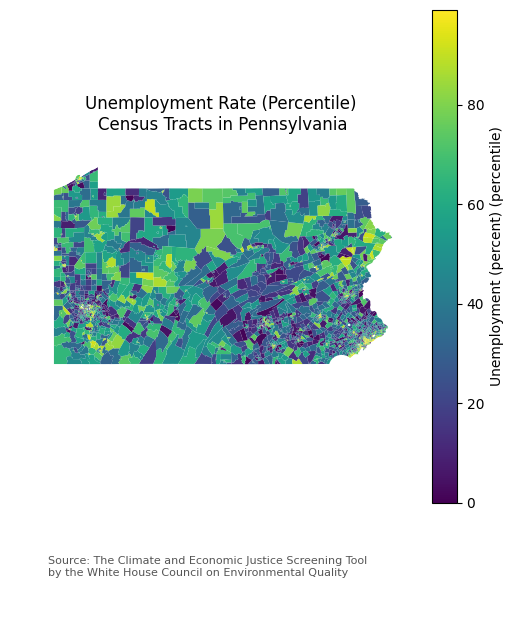

In [ ]:
# OR
# Solution 2: You can also use the original code, like so:

fig, ax = plt.subplots(1, figsize=(6, 8))

data.plot(column='Unemployment (percent) (percentile)', # Name of the column
          legend=True,
          ax=ax,
          legend_kwds = {
              'label': 'Unemployment (percent) (percentile)',
              'shrink': 0.8
          },
          missing_kwds={
                'color': 'white',
                'label': 'Missing Data'
            }
)

ax.axis('off')
ax.set_title(f'Unemployment Rate (Percentile) \nCensus Tracts in {state_name}')

ax.annotate('Source: The Climate and Economic Justice Screening Tool \nby the White House Council on Environmental Quality',
            xy=(0.08, .08),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=8,
            color='#555555')

### Checkpoint 2: In the `PM2.5 Percentile` map, was there anything surprising to you about how the data is distributed across the state? Were there any areas with especially high or low PM2.5 (small particles)?

Write your answer to this question in the text block below:

### Part 2: Correlation and Graphing

In Python, we can also calculate statistics and find the correlation between different variables. View some examples below.

In [ ]:
# Create a list of the names of columns that we are interested in
columns_subset = ['Percent Black or African American alone',
                  'Proximity to hazardous waste sites (percentile)',
                  'Energy burden (percentile)',
                  'PM2.5 in the air (percentile)',
                  'Adjusted percent of individuals below 200% Federal Poverty Line (percentile)',
                  'Housing burden (percent) (percentile)',
                  'Unemployment (percent) (percentile)']

<Axes: >

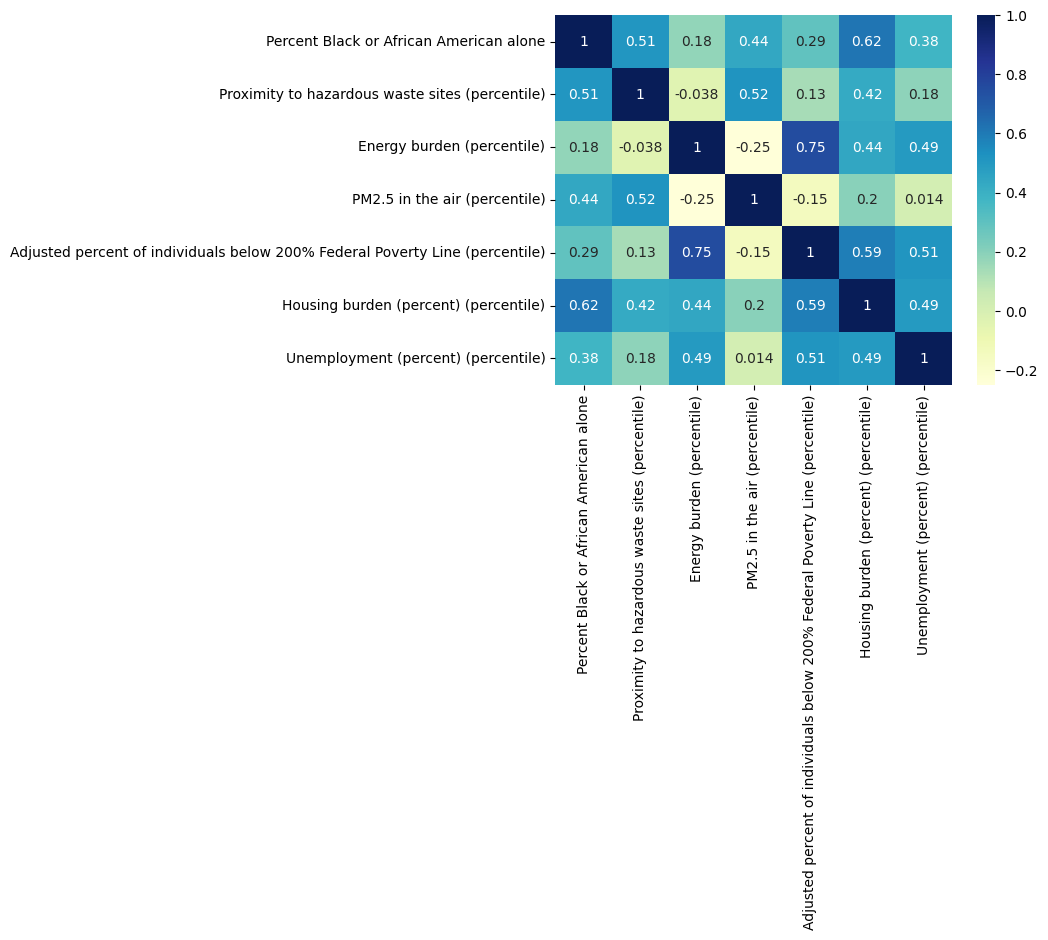

In [ ]:
sns.heatmap(data[columns_subset].corr(method = 'spearman'), cmap='YlGnBu', annot=True)

### Question 2: Find the correlation between variables you're interested in

In [ ]:
columns_subset = [""]

sns.heatmap(data[columns_subset].corr(method = 'spearman'), cmap='YlGnBu', annot=True)

#### Hint

<Axes: >

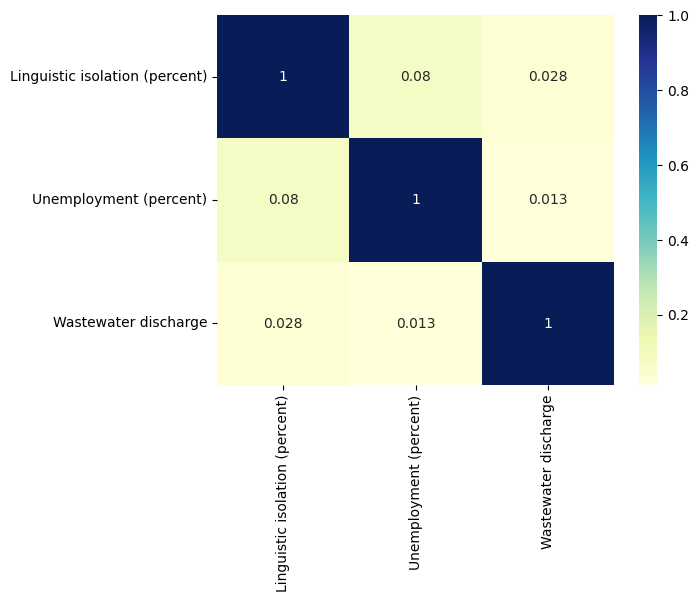

In [ ]:
# Specify column names below (you can use other columns)
columns_subset = ['Linguistic isolation (percent)',
                  'Unemployment (percent)',
                  'Wastewater discharge']

sns.heatmap(data[columns_subset].corr(method = 'spearman'), cmap='YlGnBu', annot=True)

### Part 3: Data Analysis

One way we can analyze data using Python is by sorting the data to show the census tracts with the highest or lowest values in a specific column. View some examples below.

In [ ]:
# Which census tracts have the highest unemployment rate in the state?
data.sort_values(by="Unemployment (percent)", ascending=False) \
    [['NAMELSAD10','Unemployment (percent)']] \
    .head(20) # Show the first 20

,NAMELSAD10,Unemployment (percent)
2788,Census Tract 9891,47.0
2155,Census Tract 2010,39.0
24,Census Tract 5519,33.0
8,Census Tract 511,33.0
2346,Census Tract 151.02,32.0
783,Census Tract 1,29.0
1032,Census Tract 15,28.0
2620,Census Tract 69,28.0
2485,Census Tract 200,28.0
2716,Census Tract 81.01,27.0


### Question 3: Which census tracts have the highest exposure to wasterwater discharge?

In [ ]:
# Write code here


#### Hint

Copy the code and use the "Wastewater discharge" column


```
# Which census tracts have the highest exposure to wastewater dischrage?
data.sort_values(by="COLUMN NAME", ascending=False) \
    [['NAMELSAD10','COLUMN NAME']] \
    .head(20) # Show the first 20
```



#### Solution

In [ ]:
data.sort_values(by="Wastewater discharge", ascending=False) \
    [['NAMELSAD10','Wastewater discharge']] \
    .head(20) # Show the first 20

,NAMELSAD10,Wastewater discharge
1565,Census Tract 130.02,378.76
3701,Census Tract 4,212.27
1669,Census Tract 129,65.36
3660,Census Tract 19.02,64.35
3702,Census Tract 5,57.07
3657,Census Tract 6,45.01
1221,Census Tract 250.14,44.11
946,Census Tract 101.03,38.69
3774,Census Tract 3.01,35.97
1664,Census Tract 130.01,33.38


# Further Resources

- [Spatial Data Science for Sustainable Development course taught by Henrikki Tenkanen](https://sustainability-gis.readthedocs.io/en/latest/lessons/L1/intro-to-python-geostack.html)
- [Analyze Geospatial Data in Python: GeoPandas and Shapely by Ioannis Prapas](https://www.learndatasci.com/tutorials/geospatial-data-python-geopandas-shapely/)
- [Mapping and Plotting with Python Package GeoPandas](https://geopandas.org/en/stable/docs/user_guide/mapping.html)